## 逻辑回归 - 线性可分
> + 根据学生的两门学生成绩，预测该学生是否会被大学录取
+ 数据集：ex2data1.txt

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# 导入数据
path = 'ex2data1.txt'
data = pd.read_csv(path,names=['Exam 1', 'Exam 2', 'Accepted'])

In [4]:
data.head()

,Exam 1,Exam 2,Accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


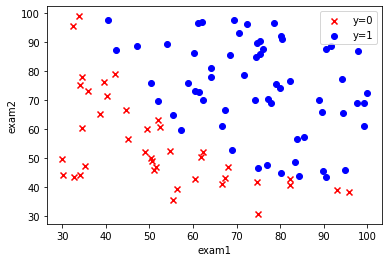

In [5]:
# 数据可视化
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'], data[data['Accepted']==0]['Exam 2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'], data[data['Accepted']==1]['Exam 2'], c='b', marker='o', label='y=1')
ax.legend()

ax.set(xlabel='exam1', ylabel='exam2')
plt.show()

## 构造数据集
封装成一个函数

In [6]:
def get_Xy(data):
    data.insert(0, 'ones', 1) # 在 X 插入常数列（数据预处理）
    X = data.iloc[:, 0:-1]
    X = X.values # 转数组格式
    
    y_ = data.iloc[:, -1]
    y = y_.values.reshape(len(y_), 1)
    
    return X, y

In [7]:
# 获取 X, y
X, y = get_Xy(data)

In [8]:
X.shape # 100个样本，3个特征

(100, 3)

In [9]:
y.shape

(100, 1)

## 损失函数
$\begin{array}{c}
y^{\wedge}=g(X \theta) \\
J(\theta)=-\frac{1}{m}\left[y^{*} \log \left(y^{\wedge}\right)+(1-y) * \log \left(1-y^{\wedge}\right)\right]
\end{array}$

In [10]:
# 先定义一个 sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # np.exp(x)

In [11]:
# 定义损失函数
def costFunction(X, y, theta):
    A = sigmoid(X@theta)
    first_part = y * np.log(A) # 这里使用的是点乘（即对应元素相乘）某种意义上和 np.multiply 方法一样
    second_part = (1-y) * np.log(1-A)
    
    return -np.sum(first_part + second_part) / len(X)

In [12]:
# 初始化 theta
theta = np.zeros((3,1))
theta.shape

(3, 1)

In [13]:
cost_init = costFunction(X, y, theta)
print(cost_init) # 打印初始的损失函数

0.6931471805599453


## 梯度下降
$\theta=\theta-\frac{\alpha}{m} * X^{T}(g(X \theta)-y)$

In [15]:
# 定义梯度下降函数
def gardientDescent(X, y, theta, iters, alpha):
    m = len(X)
    costs = []
    
    for i in range(iters):
        A = sigmoid(X@theta)
        theta = theta - (alpha / m) * X.T @ (A- y) # 这里和线性回归有些许不同，记得留意
        cost = costFunction(X, y, theta)
        costs.append(cost)
        
        if i % 1000 == 0:
            print(cost)
            
    return costs, theta    

In [16]:
# 初始化参数进行迭代
alpha = 0.004 # 学习率
iters = 200000 # 迭代次数

In [19]:
costs, theta_final = gardientDescent(X, y, theta, iters, alpha)

1.9886538578930086
3.0781700198641575
5.487009635362496
1.8519433661332636
2.9551289424083604
5.438688730769618
1.804612809072851
2.8312715776074033
5.3886531633606145
1.7561538117121567
2.706676380747812
5.3365673644957425
1.706280704769481
2.581850851905427
5.281774101800353
1.6544129958512053
2.4578430947435748
5.223255119969365
1.5996612097145562
2.336247751941463
5.159653459570274
1.5408871901849062
2.219049203846889
5.089387088751128
1.4768567851081478
2.108268509053649
5.010845104587983
1.4064493632805837
2.0054338903832725
4.9225734611717336
1.3288041261254449
1.9109646054893648
4.82325748482661
1.2432202250971687
1.8235866121521418
4.711246821296763
1.1486277932139572
1.7397667362448002
4.58325740045735
1.04234783060067
1.6525865746034036
4.430932868329269
0.9166267386002204
1.5465331276550853
4.224624720512682
0.7330944584991166
1.4562808103156948
1.4259281850381833
0.29362876456115194
3.2719007324291898
0.8726077046037045
3.8787575158421737
1.2485809621007782
0.3221106728391

In [20]:
theta_final

array([[-23.77498778],
       [  0.18690941],
       [  0.18046614]])

In [25]:
def predict(X, theta):
    
    prob = sigmoid(X@theta)
    
    return [1 if x>=0.5 else 0 for x in prob]

In [27]:
y_ = np.array(predict(X, theta_final))
y_pre  = y_.reshape(len(y), 1)
 
acc = np.mean(y_pre == y)

print(acc)

0.86


## 决策边界
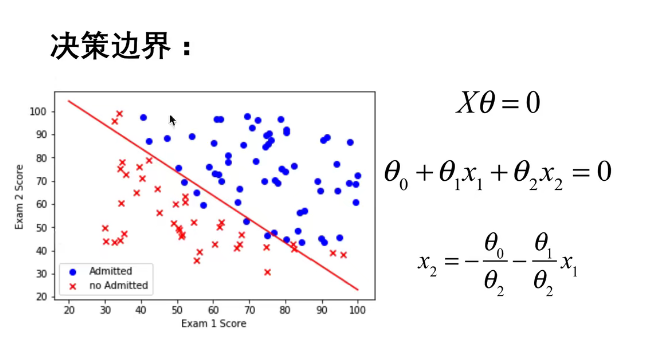

In [28]:
coef1 = - theta_final[0,0] / theta_final[2,0]
coef2 = - theta_final[1,0] / theta_final[2,0]

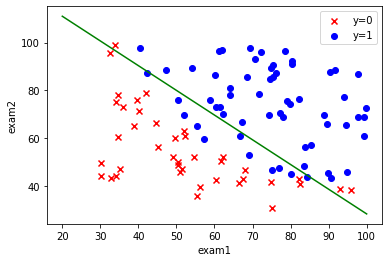

In [29]:
# 在之前图的基础上增加一条直线
x = np.linspace(20,100,100) # 使用 numpy 均匀生成 100 个点
f = coef1 + coef2 * x # 直线
fig, ax = plt.subplots()
ax.scatter(data[data['Accepted']==0]['Exam 1'], data[data['Accepted']==0]['Exam 2'], c='r', marker='x', label='y=0')
ax.scatter(data[data['Accepted']==1]['Exam 1'], data[data['Accepted']==1]['Exam 2'], c='b', marker='o', label='y=1')
ax.legend()

ax.set(xlabel='exam1', ylabel='exam2')
ax.plot(x, f, c='g') # 图中绿色的线即为决策边界
plt.show()